# Prediction using Unsupervised ML

### 1. Read data from the file.
### 2. Find the number of clusters.
### 3. Visualize clusters.

In [1]:
# import all necessary libraries;
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# save data information;
file = 'Iris.csv'
# create a dataframe;
df = pd.read_csv(file)
# drop the column 'Id';
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Find the optimum number of clusters for k-means classification.

###### The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. (More information https://scikit-learn.org/stable/modules/clustering.html#k-means)


In [3]:
# get values from the dataframe;
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = [] # within cluster summ of squares;
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

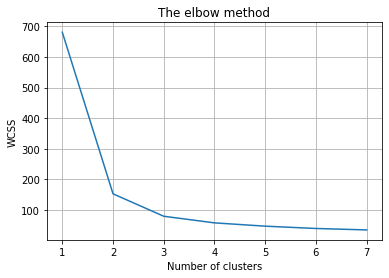

In [4]:
# plot the graph to observe 'the elbow';
plt.plot(range(1, 8), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

##### The number of clusters will be where the 'elbow' occurs.

In [5]:
# choose the number of clusters 3;
# apply kmeans to the dataset;
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

Text(0.5, 0, 'Sepal length')

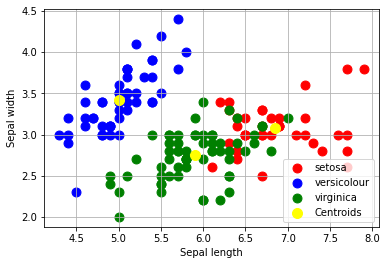

In [6]:
# visualize the clusters;
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=80, c='red', label='setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=80, c='blue', label='versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=80, c='green', label='virginica')

# plot the centroids (means) of the clusters;
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='yellow', label='Centroids')
plt.grid()
plt.legend()
plt.ylabel('Sepal width')
plt.xlabel('Sepal length')